In [1]:
from pya import *
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed, widgets
%matplotlib qt5
%matplotlib inline
import pandas as pd
import pyaudio
from collections import deque
import time

In [4]:
# Try snap with lots of triggers. 
astereo = Asig("samples/stereoTest.wav", label='stereo')
asen = Asig("samples/sentence.wav", label='sentence')
onset = [0, 24000, 48000, 54032]
seq = [asen, asen, astereo, asen]
aserver = Aserver(bs = 512, sr = 24000)
aserver.openstream().mastervolume(amp = 0.1).play(onset, seq)

AServer: Fs: 24000, Buffer Size: 512, Stream Active: True

In [3]:
aserver.closeserver()

Play Stream Stopped. 


In [4]:
aserver

AServer: Fs: 24000, Buffer Size: 512 Stream Active: False

In [ ]:
asen = Asig("samples/sentence.wav", label='sentence')
astereo = Asig("samples/stereoTest.wav", label='stereo')
onset = [0, 24000, 48000]
seq = [asen, asen, asen]
stream = SequenceStream2(bs = 512, sr = 24000)
stream.openstream()
stream.play(onset, seq)

In [3]:
astereo = Asig("samples/stereoTest.wav", label='stereo')
astereo

Asig('stereo'): 2 x 176400 @ 44100 Hz = 4.000 s

In [4]:
astereo[0:20000].play()

Asig('stereo_sliced'): 2 x 20000 @ 44100 Hz = 0.454 s

[[ 0.0000000e+00  0.0000000e+00]
 [ 3.0517578e-05  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00]
 ...
 [-2.4536133e-02  0.0000000e+00]
 [-2.7282715e-02  3.0517578e-05]
 [-2.8991699e-02  0.0000000e+00]]


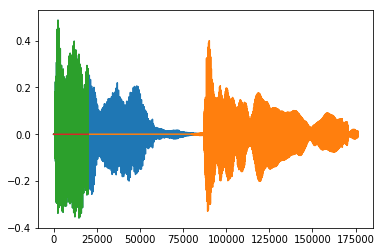

In [43]:
a = astereo.sig
a_slice = a[0:20000]
plt.plot(a)
plt.plot(a_slice)
print (a_slice)

In [29]:
asen = Asig("samples/sentence.wav", label='sentence')
asen.samples

61632

In [33]:
asen[0:20000].play()

resample as sr is exotic


Asig(''): 1 x 20000 @ 24000 Hz = 0.833 s

In [ ]:
asen.stop()

In [ ]:
# sig1 = 0.3 * np.sin(2*np.pi * 300 * np.linspace(0,1,24000 * 2))
# sig2 = 0.3 * np.sin(2*np.pi * 6000 * np.linspace(0,1,24000 * 2))
# sig3 = 0.3 * np.random.random(24000 * 3) - 0.15
onset = [0, 24000, 48000]
# sig = [asen.sig, asen.sig, astereo.sig]
sig = [asen, asen, astereo]

In [ ]:
stream = SequenceStream2(bs = 512, sr = 24000)
stream.openstream()
stream.play(onset, sig)

In [ ]:
astereo.overwrite(astereo.sig[:, 0])
print (astereo.channels)

In [ ]:
astereo.plot()

In [ ]:
astereo.channels

In [ ]:
stream.closestream()

In [ ]:
plt.plot(sig1, 'r');plt.plot(sig2, 'b');plt.plot(sig3, 'g')

In [ ]:
# %timeit mixed_sig = mixing_function(sig, onset)

In [ ]:
plt.plot(mixed_sig)

In [ ]:
maxlen = np.max([o + len(l) for o, l in zip(onset, sig)])
mixed_sig =  np.zeros(maxlen)
for i in range(len(onset)):
    mixed_sig[onset[i]:onset[i] + len(sig[i])] += sig[i] 
mixed_sig
# for i in mixed_sig:
#     print (i)

In [ ]:
maxlen = np.max([o + len(l) for o, l in zip(onset, sig)])
result =  np.zeros(maxlen)
result = []

for i in range(len(onset)):
    mixed_sig[onset[i]:onset[i] + len(sig[i])] += sig[i] 
mixed_sig

In [ ]:
signal1 = np.array([1,2,3,4])
signal2 = np.array([5,5,5])
signal3 = np.array([7,7,7,7])
onset(0, 2, 8)

result = np.array([1,2,8,9,5,0,0,0,7,7,7,7])
print ('nothing')

In [ ]:
plt.plot(sig_stacked[0])

In [ ]:
plt.plot(sig_stacked[0], 'r');plt.plot(sig_stacked[0], 'b');plt.plot(sig_stacked[0], 'g')

In [ ]:
%timeit maxlen = np.max([o + len(l) for o, l in zip(onset, sig)])

In [ ]:
aseq = np.zeros(1024)
# dq = deque([aseq, aseq, aseq, aseq], maxlen=4)
dq = deque([1, 2, 3, 4], maxlen=4)

In [ ]:
dq = deque([1, 2, 3, 4], maxlen=4)

In [ ]:
print (dq[0])
dq.rotate(-1)
dq[-1] = 5
print (dq[0])
dq.rotate(-1)
dq[-1] = 6
print (dq[0])
dq.rotate(-1)
dq[-1] = 7
print (dq[0])

In [ ]:
dq[-1] = 5
dq

In [ ]:
print (b)

In [ ]:
import numpy as np
from time import time
np.random.seed(42)

def mixing_function(sig, onset):
    maxlen = np.max([o + len(s) for o, s in zip(onset, sig)])
    result =  np.zeros(maxlen)
    for i in range(len(onset)):
        result[onset[i]:onset[i] + len(sig[i])] += sig[i] 
    return result

def mix(sig, onset):
    siglengths = np.vectorize(len)(sig)
    maxlen = max(onset + siglengths)
    result = np.zeros(maxlen)
    for i in range(len(sig)):
        result[onset[i]: onset[i]+siglengths[i]] += sig[i]
    return result


sigbig = [np.random.randn(np.random.randint(1000, 10000)) for _ in range(10000)]
onsetbig = np.random.randint(0, 10000, size=10000)

assert all(mixing_function(sigbig, onsetbig) == mix(sigbig, onsetbig))

%timeit result = mixing_function(sigbig, onsetbig)
%timeit result = mix(sigbig, onsetbig)



In [ ]:
a = np.array(([1,10],[2,20],[3,30], [4,40]))

In [ ]:
import scipy.interpolate
def resample2(sig, target_sr=44100, rate=1, kind='linear'):
    # This only work for single channel. 
    times = np.arange(sig.samples )/sig.sr
    tsel = np.arange(sig.samples/sig.sr * target_sr/rate)*rate/target_sr
    if sig.channels == 1:
        interp_fn = scipy.interpolate.interp1d(times, sig.sig, kind=kind, 
                assume_sorted=True, bounds_error=False, fill_value=sig.sig[-1])
        return Asig(interp_fn(tsel), target_sr, label=sig.label+"_resampled")
    else:
        new_sig = np.ndarray(shape = (int(sig.samples/sig.sr * target_sr/rate), sig.channels))
        for i in range(sig.channels):
            interp_fn = scipy.interpolate.interp1d(times, sig.sig[:,i], kind=kind, 
                    assume_sorted=True, bounds_error=False, fill_value=sig.sig[-1, i])
            new_sig[:, i] = interp_fn(tsel)
        return Asig(new_sig, target_sr, label=sig.label+"_resampled", channels = new_sig.shape[1])

In [ ]:
astereo = Asig("samples/stereoTest.wav", label='stereo')
astereo.channels

In [ ]:
astereo.play()

In [ ]:
astereo = resample2(astereo, 12000, rate = 0.4)
astereo.play()

In [ ]:
astereo.channels

In [ ]:
astereo.plot()


In [ ]:
tsel = np.arange(176400/44100 * 24000/0.7)*1/24000

In [ ]:
len(tsel)

In [ ]:
176400/44100 * 24000

In [ ]:
%timeit a = np.ndarray(shape = (44100* 100, 2))
%timeit a = np.zeros((44100 * 100, 2))



In [ ]:
b = a.flatten()
print (b)

In [ ]:
b = a.reshape(a.shape[0]*  a.shape[1])

In [ ]:
b *= 2

In [ ]:
a

In [ ]:
print (a)

In [ ]:
b = a.flatten()

In [ ]:

a_ver = np.mean(a, axis = 1)
print (a_ver)


In [ ]:
a = np.arange(1, 50000)
print (a)
print (np.repeat(a, 4, axis = 0).reshape(len(a), 4))
%timeit np.repeat(a, 4, axis = 0).reshape(len(a), 4)

In [ ]:
b = np.arange(1, 500000)
print (b)
print (np.dstack([b]*4))
%timeit np.dstack([b]*4)

In [ ]:
c =convertstack(b)
%timeit convertstack(b)
c

In [ ]:
def mono2chan(b):
    c = np.repeat(b, 4)
#     return c.reshape(len(b), 4)
    return c
     

In [ ]:
c = mono2chan(b)
%timeit mono2chan(b)
c

In [ ]:
a = np.arange(0, 44100)

In [ ]:
def makechunk2(lst, chunk):
    result = []
    lst = np.pad(lst, (0, lst.shape[0]%chunk), 'constant')
    for i in np.arange(0, len(lst), chunk):
        temp = lst[i:i + chunk]
        result.append(temp)
    return result
c = makechunk(a, 512)
# %timeit c = makechunk(a, 512)

In [ ]:
np.array_equal(c,b)

In [ ]:
a = [1,2,3]
print (np.min(a))